In [44]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('covid.csv',index_col=0)
data.head(12)

,Daily Cases,Total Cases,Total Deaths,Total Recovered,Active Cases,Daily Test Cases,Total Intensive Care,Intubated Cases,Case incrase rate %,Daily(Cases/Test) %,(Recovered / Active Cases) %,(Death / Active Cases) %,(Active Cases / Population) %
Date,,,,,,,,,,,,,
3/11/2020,1,1,0,0,1,NaN,NaN,NaN,0.00,NaN,0.0,0.00,0.000001
3/12/2020,0,1,0,0,1,NaN,NaN,NaN,0.00,NaN,0.0,0.00,0.000001
3/13/2020,4,5,0,0,5,NaN,NaN,NaN,400.00,NaN,0.0,0.00,0.000006
3/14/2020,1,6,0,0,6,NaN,NaN,NaN,20.00,NaN,0.0,0.00,0.000007
3/15/2020,12,18,0,0,18,NaN,NaN,NaN,200.00,NaN,0.0,0.00,0.000021
3/16/2020,29,47,0,0,47,NaN,NaN,NaN,161.12,NaN,0.0,0.00,0.000056
3/17/2020,51,98,1,0,97,NaN,NaN,NaN,108.52,NaN,0.0,1.04,0.000115
3/18/2020,93,191,3,0,188,NaN,NaN,NaN,94.90,NaN,0.0,1.60,0.000223
3/19/2020,168,359,4,0,355,1981.0,NaN,NaN,87.96,8.49,0.0,1.13,0.000422


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 3/11/2020 to 6/25/2020
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Daily Cases                    107 non-null    int64  
 1   Total Cases                    107 non-null    int64  
 2   Total Deaths                   107 non-null    int64  
 3   Total Recovered                107 non-null    int64  
 4   Active Cases                   107 non-null    int64  
 5   Daily Test Cases               99 non-null     float64
 6   Total Intensive Care           91 non-null     float64
 7   Intubated Cases                91 non-null     float64
 8   Case incrase rate %            107 non-null    float64
 9   Daily(Cases/Test) %            99 non-null     float64
 10  (Recovered / Active Cases) %   107 non-null    float64
 11  (Death / Active Cases) %       107 non-null    float64
 12  (Active Cases / Population) %  107 non-nu

In [12]:
data.isnull().sum()

Daily Cases                       0
Total Cases                       0
Total Deaths                      0
Total Recovered                   0
Active Cases                      0
Daily Test Cases                  8
Total Intensive Care             16
Intubated Cases                  16
Case incrase rate %               0
Daily(Cases/Test) %               8
(Recovered / Active Cases) %      0
(Death / Active Cases) %          0
(Active Cases / Population) %     0
dtype: int64

In [46]:
!pip install ycimpute 
from ycimpute.imputer import knnimput
name=list(data)
n_df=np.array(data)

In [14]:
n_df[0:3]

array([[1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,      nan,
             nan,      nan, 0.00e+00,      nan, 0.00e+00, 0.00e+00,
        1.19e-06],
       [0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,      nan,
             nan,      nan, 0.00e+00,      nan, 0.00e+00, 0.00e+00,
        1.19e-06],
       [4.00e+00, 5.00e+00, 0.00e+00, 0.00e+00, 5.00e+00,      nan,
             nan,      nan, 4.00e+02,      nan, 0.00e+00, 0.00e+00,
        5.95e-06]])

In [47]:
dataknn = knnimput.KNN(k=10).complete(n_df)

Imputing row 1/107 with 4 missing, elapsed time: 0.133
Imputing row 101/107 with 0 missing, elapsed time: 0.153


In [7]:
type(dataknn)

numpy.ndarray

In [48]:
data = pd.DataFrame(dataknn,columns = name)

In [9]:
data

,Daily Cases,Total Cases,Total Deaths,Total Recovered,Active Cases,Daily Test Cases,Total Intensive Care,Intubated Cases,Case incrase rate %,Daily(Cases/Test) %,(Recovered / Active Cases) %,(Death / Active Cases) %,(Active Cases / Population) %
0,1.0,1.0,0.0,0.0,1.0,3794.975847,745.177602,524.731464,0.00,10.985203,0.00,0.00,0.000001
1,0.0,1.0,0.0,0.0,1.0,3794.828320,745.227160,524.765859,0.00,10.985119,0.00,0.00,0.000001
2,4.0,5.0,0.0,0.0,5.0,4369.217135,838.440333,588.709823,400.00,13.153759,0.00,0.00,0.000006
3,1.0,6.0,0.0,0.0,6.0,3651.113427,739.991090,521.066289,20.00,10.853200,0.00,0.00,0.000007
4,12.0,18.0,0.0,0.0,18.0,3935.264895,780.328728,548.714824,200.00,11.853763,0.00,0.00,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1192.0,188159.0,4950.0,160240.0,22969.0,40496.000000,803.000000,327.000000,0.64,2.950000,697.64,21.56,0.027299
103,1212.0,189371.0,4974.0,161533.0,22864.0,41413.000000,846.000000,345.000000,0.65,2.930000,706.50,21.76,0.027174
104,1268.0,190639.0,5001.0,162848.0,22790.0,42982.000000,893.000000,362.000000,0.67,2.960000,714.56,21.95,0.027086
105,1492.0,192131.0,5025.0,164234.0,22872.0,53486.000000,914.000000,356.000000,0.79,2.790000,718.06,21.98,0.027183


In [49]:
data.isnull().sum()

Daily Cases                      0
Total Cases                      0
Total Deaths                     0
Total Recovered                  0
Active Cases                     0
Daily Test Cases                 0
Total Intensive Care             0
Intubated Cases                  0
Case incrase rate %              0
Daily(Cases/Test) %              0
(Recovered / Active Cases) %     0
(Death / Active Cases) %         0
(Active Cases / Population) %    0
dtype: int64

In [12]:
data.head(10)

,Daily Cases,Total Cases,Total Deaths,Total Recovered,Active Cases,Daily Test Cases,Total Intensive Care,Intubated Cases,Case incrase rate %,Daily(Cases/Test) %,(Recovered / Active Cases) %,(Death / Active Cases) %,(Active Cases / Population) %
0,1.0,1.0,0.0,0.0,1.0,3794.975847,745.177602,524.731464,0.00,10.985203,0.0,0.00,0.000001
1,0.0,1.0,0.0,0.0,1.0,3794.828320,745.227160,524.765859,0.00,10.985119,0.0,0.00,0.000001
2,4.0,5.0,0.0,0.0,5.0,4369.217135,838.440333,588.709823,400.00,13.153759,0.0,0.00,0.000006
3,1.0,6.0,0.0,0.0,6.0,3651.113427,739.991090,521.066289,20.00,10.853200,0.0,0.00,0.000007
4,12.0,18.0,0.0,0.0,18.0,3935.264895,780.328728,548.714824,200.00,11.853763,0.0,0.00,0.000021
5,29.0,47.0,0.0,0.0,47.0,3684.416963,764.009633,537.436521,161.12,11.153703,0.0,0.00,0.000056
6,51.0,98.0,1.0,0.0,97.0,2938.457899,742.097449,522.286962,108.52,9.250060,0.0,1.04,0.000115
7,93.0,191.0,3.0,0.0,188.0,2653.260370,735.992284,518.065669,94.90,8.881874,0.0,1.60,0.000223
8,168.0,359.0,4.0,0.0,355.0,1981.000000,833.380919,587.213203,87.96,8.490000,0.0,1.13,0.000422
9,311.0,670.0,9.0,0.0,661.0,3656.000000,834.601831,588.266911,86.63,8.510000,0.0,1.37,0.000786


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Cases,107.0,1809.242991,1298.479705,0.000000,985.000000,1491.000000,2424.000000,5138.000000
Total Cases,107.0,104105.943925,67517.310109,1.000000,32163.000000,126045.000000,163085.500000,193589.000000
Total Deaths,107.0,2756.457944,1877.684168,0.000000,687.000000,3397.000000,4502.000000,5046.000000
Total Recovered,107.0,67576.205607,62052.868229,0.000000,1454.000000,63151.000000,126473.500000,165706.000000
Active Cases,107.0,33773.280374,22910.296958,1.000000,22098.500000,31903.000000,46290.000000,80808.000000
Daily Test Cases,99.0,31482.313131,13210.232443,1758.000000,22746.500000,34821.000000,40348.500000,57829.000000
Total Intensive Care,91.0,1104.428571,450.158568,344.000000,724.000000,941.000000,1486.000000,1922.000000
Intubated Cases,91.0,593.923077,290.022077,241.000000,314.500000,508.000000,882.500000,1087.000000
Case incrase rate %,107.0,16.710280,48.334654,0.000000,0.700000,1.440000,11.430000,400.000000
Daily(Cases/Test) %,99.0,7.614848,5.452479,1.610000,3.150000,5.210000,11.640000,27.470000


In [20]:
data[['Daily Test Cases','Total Deaths']].groupby(['Daily Test Cases'],as_index=False).mean().sort_values(by='Total Deaths',ascending=False)

,Daily Test Cases,Total Deaths
91,52303.0,5046
94,53486.0,5025
84,42982.0,5001
80,41413.0,4974
74,40496.0,4950
...,...,...
4,3672.0,37
0,1758.0,30
2,2953.0,21
3,3656.0,9


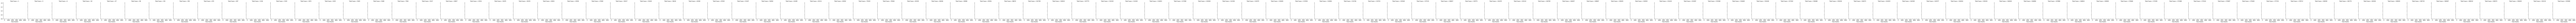

In [25]:
graf = sns.FacetGrid(data,col='Total Cases')
graf.map(plt.hist,'Total Deaths',bins=1000)

In [33]:
data.head()

,Daily Cases,Total Cases,Total Deaths,Total Recovered,Active Cases,Daily Test Cases,Total Intensive Care,Intubated Cases,Case incrase rate %,Daily(Cases/Test) %,(Recovered / Active Cases) %,(Death / Active Cases) %,(Active Cases / Population) %
0,1.0,1.0,0.0,0.0,1.0,3794.975847,745.177602,524.731464,0.0,10.985203,0.0,0.0,0.000001
1,0.0,1.0,0.0,0.0,1.0,3794.828320,745.227160,524.765859,0.0,10.985119,0.0,0.0,0.000001
2,4.0,5.0,0.0,0.0,5.0,4369.217135,838.440333,588.709823,400.0,13.153759,0.0,0.0,0.000006
3,1.0,6.0,0.0,0.0,6.0,3651.113427,739.991090,521.066289,20.0,10.853200,0.0,0.0,0.000007
4,12.0,18.0,0.0,0.0,18.0,3935.264895,780.328728,548.714824,200.0,11.853763,0.0,0.0,0.000021


In [53]:
datadrop = data.drop(['Daily Cases','Total Recovered','Active Cases','Daily Test Cases','Total Intensive Care','Intubated Cases','Case incrase rate %','Daily(Cases/Test) %','(Recovered / Active Cases) %',
                      '(Death / Active Cases) %','(Active Cases / Population) %'],axis=1).groupby(['Total Cases']).mean()
datadrop.head()

,Total Deaths
Total Cases,
1.0,0.0
5.0,0.0
6.0,0.0
18.0,0.0
47.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD183B3688>],
      dtype=object)

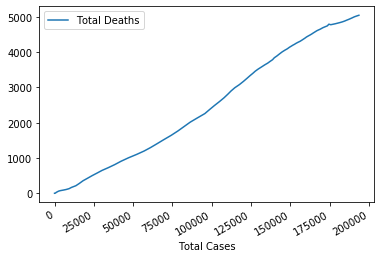

In [54]:
datadrop.plot(subplots=True)
